In [11]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [12]:
# Step 2: Load the Dataset
# Make sure the CSV file is in the same folder OR give full path to CSV
df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
print(df.head())  # Check if data loaded

   Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...

In [13]:
# Step 3: Data Cleaning (Drop unnecessary columns)
df.drop(['EmployeeCount', 'Over18', 'StandardHours', 'EmployeeNumber'], axis=1, inplace=True)

# Encode 'Attrition' (Target variable) - Yes:1, No:0
df['Attrition'] = df['Attrition'].apply(lambda x: 1 if x == 'Yes' else 0)

In [14]:
# Step 4: Encode Categorical Variables (One-Hot Encoding)
cat_cols = ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']
df = pd.get_dummies(df, columns=cat_cols, drop_first=True)

In [15]:
# Step 5: Define Features (X) and Target (y)
X = df.drop(['Attrition'], axis=1)
y = df['Attrition']

In [16]:
# Step 6: Scale Numerical Features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [17]:
# Step 7: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, stratify=y, random_state=42)


In [18]:
# Step 8: Train Decision Tree Model
model = DecisionTreeClassifier(class_weight='balanced', max_depth=5, random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=5, random_state=42)

In [19]:
# Step 9: Predict on Test Data
y_pred = model.predict(X_test)


In [20]:
# Step 10: Model Evaluation - Accuracy Report & Confusion Matrix
print("=== Model Accuracy Report ===")
print(classification_report(y_test, y_pred))

accuracy = accuracy_score(y_test, y_pred)
print(f"Overall Model Accuracy: {accuracy * 100:.2f}%")

=== Model Accuracy Report ===
              precision    recall  f1-score   support

           0       0.90      0.82      0.86       247
           1       0.36      0.53      0.43        47

    accuracy                           0.77       294
   macro avg       0.63      0.67      0.64       294
weighted avg       0.81      0.77      0.79       294

Overall Model Accuracy: 77.21%


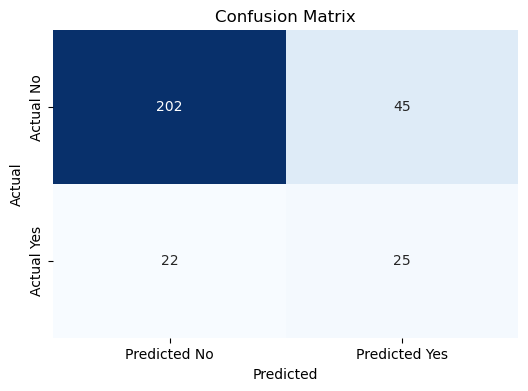

In [21]:
# Confusion Matrix Heatmap
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted No', 'Predicted Yes'],
            yticklabels=['Actual No', 'Actual Yes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()